### Load R packages for importing and data visualization

In [93]:
library("tidyverse")
library("readxl")
library("stringr")
library("ggplot2")
library("dplyr")

In [94]:
rawgrowth <- read_excel("/Users/jasminereighard/Downloads/finalproject_rawalgaegrowth.xlsx")

## 1. Link to a description of the variables in the dataset below
### Includes how this data is used within the domain and the number of observations
[Link here](https://docs.google.com/document/d/10wJUzD6_f__jpcLPoO_58aJF5tneE4EOSoO9PGh1oQA/edit?usp=sharing)

## Data wrangling

#### Data is connected by commas and need to be deliminated into their own cells

In [95]:
rawgrowth[c('Date', 'ID', 'Species', 'Weight difference (g)', 'Run','Lanai side', 'Treatment' ,'Temperature (C)', 'Initial weight (g)', 'Final weight (g)','Plant ID', 'RLC order', 'Lunar phase')] <- str_split_fixed(rawgrowth$'date,ID,Species,weight difference,run,lanai side,treatment,temperature,Initial weight,final weight,plant ID,RLC order, lunar phase', ',', 13)

#### Remove column with multiple variables

In [96]:
rawgrowth$'date,ID,Species,weight difference,run,lanai side,treatment,temperature,Initial weight,final weight,plant ID,RLC order, lunar phase' <- NULL

In [97]:
head(rawgrowth)

Date,ID,Species,Weight difference (g),Run,Lanai side,Treatment,Temperature (C),Initial weight (g),Final weight (g),Plant ID,RLC order,Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
9/28/21,Hm1-1,Hm,0.0466,1,ewa,1,30 C,0.2879,0.3345,1,6,IV
9/28/21,Hm1-2,Hm,0.1107,1,ewa,2,30 C,0.2773,0.388,1,6,IV
9/28/21,Hm1-3,Hm,0.0968,1,ewa,3,30 C,0.2848,0.3816,1,6,IV
9/28/21,Hm1-4,Hm,0.08,1,ewa,4,30 C,0.2477,0.3277,1,6,IV
9/28/21,Ul1-1,Ul,-0.0287,1,ewa,1,30 C,0.2705,0.2418,1,6,IV
9/28/21,Ul1-2,Ul,-0.0745,1,ewa,2,30 C,0.2595,0.185,1,6,IV


#### Remove unnecessary variable for data analysis

In [98]:
rawgrowth$Date <- NULL

In [99]:
rawgrowth$ID <- NULL

In [100]:
rawgrowth$Run <- NULL

In [101]:
rawgrowth$'Plant ID' <- NULL

In [102]:
rawgrowth$'Lanai side' <- NULL

In [103]:
rawgrowth$'RLC order' <- NULL

In [104]:
head(rawgrowth)

Species,Weight difference (g),Treatment,Temperature (C),Initial weight (g),Final weight (g),Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hm,0.0466,1,30 C,0.2879,0.3345,IV
Hm,0.1107,2,30 C,0.2773,0.388,IV
Hm,0.0968,3,30 C,0.2848,0.3816,IV
Hm,0.08,4,30 C,0.2477,0.3277,IV
Ul,-0.0287,1,30 C,0.2705,0.2418,IV
Ul,-0.0745,2,30 C,0.2595,0.185,IV


#### Reorder table

In [105]:
growthdata <- rawgrowth[,c("Species", "Treatment", "Temperature (C)", "Initial weight (g)",
                           "Final weight (g)", "Weight difference (g)", "Lunar phase")]

In [106]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Weight difference (g),Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hm,1,30 C,0.2879,0.3345,0.0466,IV
Hm,2,30 C,0.2773,0.388,0.1107,IV
Hm,3,30 C,0.2848,0.3816,0.0968,IV
Hm,4,30 C,0.2477,0.3277,0.08,IV
Ul,1,30 C,0.2705,0.2418,-0.0287,IV
Ul,2,30 C,0.2595,0.185,-0.0745,IV


#### Make a new column that keeps only the numerical values (effectively removes the C in temperatures for consistency)

In [107]:
growthdata$'Temperature (C)' <- as.factor(substr(growthdata$'Temperature (C)', 1, 2))

In [108]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Weight difference (g),Lunar phase
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>
Hm,1,30,0.2879,0.3345,0.0466,IV
Hm,2,30,0.2773,0.388,0.1107,IV
Hm,3,30,0.2848,0.3816,0.0968,IV
Hm,4,30,0.2477,0.3277,0.08,IV
Ul,1,30,0.2705,0.2418,-0.0287,IV
Ul,2,30,0.2595,0.185,-0.0745,IV


#### Convert treatment to factors from characters

In [109]:
growthdata$Treatment <- as.factor(as.character(growthdata$Treatment))

#### Convert lunar phase to factors from characters

In [110]:
growthdata$'Lunar phase' <- as.factor(as.character(growthdata$'Lunar phase'))

#### Convert Initial and Final Weight to factors from characters

In [111]:
growthdata$'Initial weight (g)' <- as.double(as.character(growthdata$'Initial weight (g)'))
growthdata$'Final weight (g)' <- as.double(as.character(growthdata$'Final weight (g)'))

#### Calculate Weight Difference column to fill in for missing points

In [112]:
growthdata$'Weight Differences (g)' <- growthdata$'Final weight (g)' - growthdata$'Initial weight (g)'

In [113]:
growthdata$'Weight difference (g)' <- NULL

#### Assign species names from the abbreviations

In [114]:
growthdata$'Species'[growthdata$Species == "Hm"] <- "Hypnea"
growthdata$'Species'[growthdata$Species == "Ul"] <- "Ulva"

#### Make a new column for percent growth (divide initial from weight difference and multiply by 100)

In [115]:
growthdata$'Percent Growth (%)' <- ((growthdata$'Weight Differences (g)' / growthdata$'Initial weight (g)') * 100) 

In [116]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Lunar phase,Weight Differences (g),Percent Growth (%)
<chr>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
Hypnea,1,30,0.2879,0.3345,IV,0.0466,16.18618
Hypnea,2,30,0.2773,0.3880,IV,0.1107,39.92066
Hypnea,3,30,0.2848,0.3816,IV,0.0968,33.98876
Hypnea,4,30,0.2477,0.3277,IV,0.0800,32.29713
Ulva,1,30,0.2705,0.2418,IV,-0.0287,-10.60998
Ulva,2,30,0.2595,0.1850,IV,-0.0745,-28.70906


#### Convert Species to factors from characters

In [117]:
growthdata$Species <- as.factor(as.character(growthdata$Species))

## Exploratory Data Analysis

### Make a scatterplot with fitted line for percents growth by treatment

In [118]:
t_sp <- ggplot(growthdata, aes(x = `Initial weight (g)`, y = `Final weight (g)`)) +
    geom_point(aes(color = factor(Species))) +
    facet_wrap( ~ Treatment, ncol=2) +
    labs(
        title = "Total Weight Difference (g) Between Treatments",
        x = "Inital weight (g)",
        y = "Final weight (g)",
        color = "Species") + 
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)

`geom_smooth()` using formula 'y ~ x'



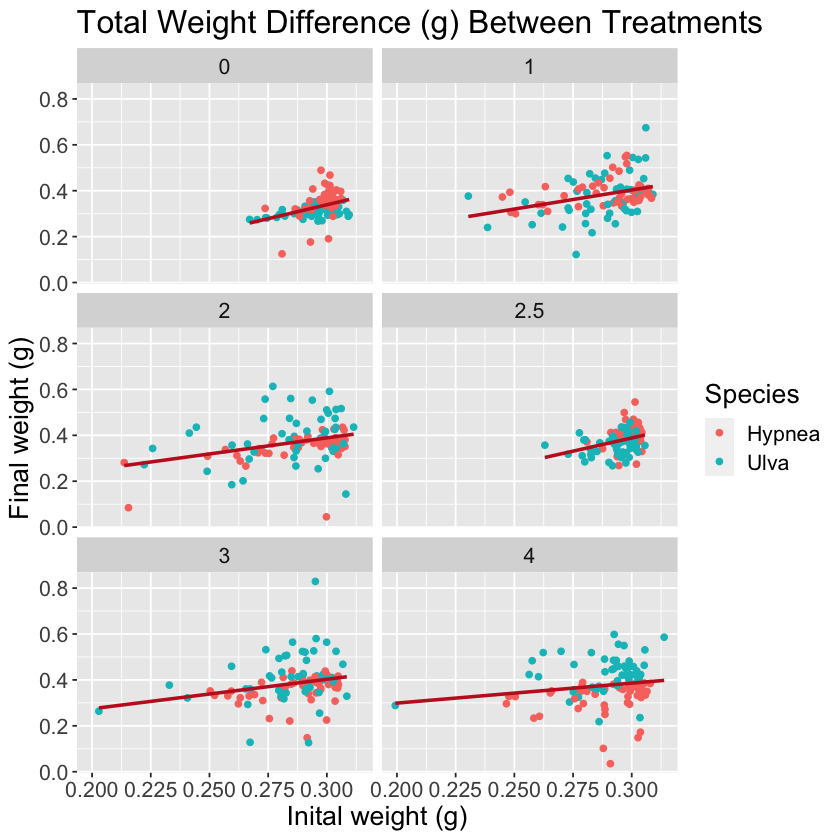

In [119]:
fixt_sp <- t_sp +
    theme(text = element_text(size = 16))
fixt_sp

## Make a grouped barchart

#### Subset each treatment

In [120]:
t0sub <- subset(growthdata, Treatment==0)
t1sub <- subset(growthdata, Treatment==1)
t2sub <- subset(growthdata, Treatment==2)
t3sub <- subset(growthdata, Treatment==3)
t4sub <- subset(growthdata, Treatment==4)
t2_5sub <- subset(growthdata, Treatment==2.5)

#### Calculate mean from each treatment by species

In [121]:
t0avg <- aggregate(t0sub$'Percent Growth (%)', list(t0sub$Species), FUN=mean)
t1avg <- aggregate(t1sub$'Percent Growth (%)', list(t1sub$Species), FUN=mean)
t2avg <- aggregate(t2sub$'Percent Growth (%)', list(t2sub$Species), FUN=mean)
t3avg <- aggregate(t3sub$'Percent Growth (%)', list(t3sub$Species), FUN=mean)
t4avg <- aggregate(t4sub$'Percent Growth (%)', list(t4sub$Species), FUN=mean)
t2_5avg <- aggregate(t2_5sub$'Percent Growth (%)', list(t2_5sub$Species), FUN=mean)

#### Combine all percent growth averages into new table

In [122]:
avg_spgrowth <- rbind(t0avg, t1avg, t2avg, t3avg, t4avg, t2_5avg)

In [123]:
head(avg_spgrowth)

,Group.1,x
,<fct>,<dbl>
1,Hypnea,18.236652
2,Ulva,4.457724
3,Hypnea,35.341096
4,Ulva,30.580696
5,Hypnea,19.931004
6,Ulva,38.100976


#### Assign each treatment, respectively

In [124]:
avg_spgrowth$Treatment <- c(0, 0, 1, 1, 2, 2, 3, 3,
                            4, 4, 2.5, 2.5)

### Create barchart for average percent growth (%) by species across 6 treatments 

In [125]:
perc_growthBC <- ggplot(avg_spgrowth, aes(x=Group.1, y=x)) + 
    geom_bar(position="dodge", stat="identity",aes(fill=factor(Treatment))) +
           labs(
        title = "Average Algal Percent Growth Across Treatments",
        x = "Species",
        y = "Percent Growth (%)",
        fill = "Treatment")  

In [ ]:
fixperc_growthBC <- perc_growthBC +
    theme(text = element_text(size = 16))
fixperc_growthBC

### Make a box and whisker plot for percent growth for for each treatment

#### Subset each treatment

In [ ]:
b_w_pg <- ggplot(growthdata, aes(x=Species, y=`Percent Growth (%)`, fill=Species)) +
    geom_boxplot(outlier.colour="black", outlier.shape=16, outlier.size=2) +
    facet_wrap( ~ Treatment, ncol=2) +
    labs(
        title = "Growth Rate (%) for all Treatments",
        x = "Species",
        y = "Growth Rate (%)"
      )

In [ ]:
fixb_w_pg <- b_w_pg +
    theme(text = element_text(size = 16))
fixb_w_pg

## Statistical Analysis

#### Subset dataset by species of algae

In [ ]:
ulv_sub <- subset(growthdata, Species=="Ulva")
hyp_sub <- subset(growthdata, Species=="Hypnea")

#### Check for equal variances using Bartlettʻs test

In [ ]:
bartlett.test(`Percent Growth (%)` ~ Treatment, data = ulv_sub)

#### P-value is significant (<0.05), therefore we reject the null hypothesis and can run next test

## Run ANOVA

## Do a Tukey (Post hoc) to see if the means of percent growth differ significantly between treatments

what is diff on tukey; for every % growth change; the difference is 26 for 1-0 treatments; 
pairwise comparison across treatments 

In [ ]:
ulv_model <- aov(`Percent Growth (%)` ~ Treatment, data = ulv_sub)
summary(ulv_model)
TukeyHSD(ulv_model, conf.level = 0.95)

In [ ]:
hyp_model <- aov(`Percent Growth (%)` ~ Treatment, data = hyp_sub)
summary(hyp_model)
TukeyHSD(hyp_model, conf.level = 0.95)

#### Plot Tukey to visualize confidence intervals

#### Ulva Tukey plot

In [ ]:
ulva_tukey <- plot(TukeyHSD(ulv_model, conf.level=.95), las = 2)
ulva_tukey

#### Hypnea Tukey plot

In [ ]:
hyp_tukey <- plot(TukeyHSD(hyp_model, conf.level=.95), las = 2)
hyp_tukey

## Parallel Slopes Regression Model 

In [ ]:
lm_ulv_pg = lm(`Percent Growth (%)` ~ Treatment + 0, ulv_sub)
lm_hyp_pg = lm(`Percent Growth (%)` ~ Treatment + 0, hyp_sub)

#### Summary for Ulva

In [ ]:
summary(lm_ulv_pg)

#### Summary for Hypnea

In [ ]:
summary(lm_hyp_pg)

#### Box and Whisker Plot for Ulva

In [ ]:
bw_ulva <- ggplot(ulv_sub, aes(Treatment, `Percent Growth (%)`)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

In [ ]:
fixbw_ulva <- bw_ulva +
    theme(text = element_text(size = 16))
fixbw_ulva

#### Box and Whisker for Hypnea

In [ ]:
bw_hyp <- ggplot(hyp_sub, aes(Treatment, `Percent Growth (%)`)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

In [ ]:
fixbw_hyp <- bw_hyp +
    theme(text = element_text(size = 16))
fixbw_hyp

## Principal Component Analysis (PCA)

#### Use sapply to make ulv_sub numeric

In [ ]:
ulv_sub_new <- ulv_sub[sapply(ulv_sub, is.numeric)]

#### Use function prcomp() to calculate the principal components of the ulv_sub
#### Specify scale to = TRUE in order for each of the variables to have a mean of 0 and a standard deviation of 1 before calculating the principal components

In [ ]:
ulv_PCA <- prcomp(ulv_sub_new, scale = TRUE)

In [ ]:
ulv_PCA$rotation <- -1*ulv_PCA$rotation

In [ ]:
ulv_PCA

In [ ]:
ulv_PCA$x <- -1*ulv_PCA$x

In [ ]:
head(ulv_PCA$x)

In [ ]:
biplot(ulv_PCA, scale = 0)

In [ ]:
head(ulv_sub[order(-ulv_sub$`Percent Growth (%)`),])

#### Calculate total variance explained by each principal component

#### Each of the numbers below shows the percentage of variance each principal component explains in the data set
#### PC 1 and 2 explain the most variance 

In [ ]:
ulv_PCA$sdev^2/sum(ulv_PCA$sdev^2)

#### Make a scree plot to display the total variance explained by each principal component

In [ ]:
var_explained = ulv_PCA$sdev^2/sum(ulv_PCA$sdev^2)

In [ ]:
screeplot <- qplot(c(1:4), var_explained) +
    geom_line() +
    xlab("Principal Component") +
    ylab("Variance Explained") +
    ggtitle("Scree Plot") +
    ylim(0,1)

In [ ]:
fix_screeplot <- screeplot +
    theme(text = element_text(size = 16))
fix_screeplot